# Nivell 1

- Exercici 1

Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

- Exercici 2

Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

Hem creat una base de dades amb MongoDB i li hem afegit algunes dades. A continuació ens connectarem a la base de dades i mostrarem les dades que vam afegir.

In [51]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["itacademy"]

In [14]:
print(myclient.list_database_names())

['admin', 'config', 'guiaRestaurants', 'itacademy', 'local', 'optica', 'pizzeria', 'test']


In [21]:
mycol = mydb["itacademy"]

In [28]:
for x in mycol.find():
    print(x)

{'_id': ObjectId('616d85381446d4a35a4f90c3'), 'nom': 'Pedro', 'cognom': 'Armengol', 'salari': 7000, 'carrec': 'CEO', 'achievements': 539, 'sexe': 'masculi'}
{'_id': ObjectId('616da6721446d4a35a4f90c5'), 'nom': 'Manolita', 'cognom': 'Martinez', 'salari': 8000, 'carrec': 'CEO', 'achievements': 655, 'sexe': 'femeni'}
{'_id': ObjectId('616da6b61446d4a35a4f90c7'), 'nom': 'Alba', 'cognom': 'Guimera', 'salari': 1000, 'carrec': 'secretaria', 'achievements': 11, 'sexe': 'femeni'}
{'_id': ObjectId('616da6fa1446d4a35a4f90c8'), 'nom': 'Pepito', 'cognom': 'Jimenez', 'salari': 1000, 'carrec': 'secretaria', 'achievements': 14, 'sexe': 'altres'}
{'_id': ObjectId('616da7ef1446d4a35a4f90c9'), 'nom': 'Martin', 'cognom': 'Donosti', 'salari': 2000, 'carrec': 'marketing', 'achievements': 96, 'sexe': 'masculi'}
{'_id': ObjectId('616da86b1446d4a35a4f90ca'), 'nom': 'Quique', 'cognom': 'Guimera', 'salari': 1000, 'carrec': 'secretaria', 'achievements': 5, 'sexe': 'femeni'}
{'_id': ObjectId('616ebff53b87eb2bc289f

# Nivell 2

- Exercici 1

Carega algunes consultes senzilles a un Pandas Dataframe. 

DataFrame de totes les dades disponibles.

In [33]:
records = []
for x in mycol.find():
    records.append(x)

data_df = pd.DataFrame(records)
data_df

,_id,nom,cognom,salari,carrec,achievements,sexe
0,616d85381446d4a35a4f90c3,Pedro,Armengol,7000,CEO,539,masculi
1,616da6721446d4a35a4f90c5,Manolita,Martinez,8000,CEO,655,femeni
2,616da6b61446d4a35a4f90c7,Alba,Guimera,1000,secretaria,11,femeni
3,616da6fa1446d4a35a4f90c8,Pepito,Jimenez,1000,secretaria,14,altres
4,616da7ef1446d4a35a4f90c9,Martin,Donosti,2000,marketing,96,masculi
5,616da86b1446d4a35a4f90ca,Quique,Guimera,1000,secretaria,5,femeni
6,616ebff53b87eb2bc289f5ab,Ona,Perez,2300,marketing,189,femeni


Només les que treballin de secretaria.

In [37]:
records = []
for x in mycol.find({'carrec': "secretaria"}):
    records.append(x)
    
pd.DataFrame(records)

,_id,nom,cognom,salari,carrec,achievements,sexe
0,616da6b61446d4a35a4f90c7,Alba,Guimera,1000,secretaria,11,femeni
1,616da6fa1446d4a35a4f90c8,Pepito,Jimenez,1000,secretaria,14,altres
2,616da86b1446d4a35a4f90ca,Quique,Guimera,1000,secretaria,5,femeni


Buscar per cognom Armengol.

In [46]:
records = []
for x in mycol.find({'cognom': "Armengol"}):
    records.append(x)
    
pd.DataFrame(records)

,_id,nom,cognom,salari,carrec,achievements,sexe
0,616d85381446d4a35a4f90c3,Pedro,Armengol,7000,CEO,539,masculi


Només amb salari superior a 1500 euros.

In [39]:
records = []
for x in mycol.find({'salari': {"$gt": 1500}}):
    records.append(x)
    
pd.DataFrame(records)

,_id,nom,cognom,salari,carrec,achievements,sexe
0,616d85381446d4a35a4f90c3,Pedro,Armengol,7000,CEO,539,masculi
1,616da6721446d4a35a4f90c5,Manolita,Martinez,8000,CEO,655,femeni
2,616da7ef1446d4a35a4f90c9,Martin,Donosti,2000,marketing,96,masculi
3,616ebff53b87eb2bc289f5ab,Ona,Perez,2300,marketing,189,femeni


Només els CEOs i les columnes de nom, cognom i salari.

In [40]:
records = []
for x in mycol.find({'carrec': "CEO"}, {'nom', 'cognom', 'salari'}):
    records.append(x)
    
pd.DataFrame(records)

,_id,nom,cognom,salari
0,616d85381446d4a35a4f90c3,Pedro,Armengol,7000
1,616da6721446d4a35a4f90c5,Manolita,Martinez,8000


# Nivell 3

- Exercici 1

Genera un resum estadístic de la informació que conté la base de dades.

In [47]:
data_df.describe()

,salari,achievements
count,7.000000,7.000000
mean,3185.714286,215.571429
std,3006.896834,270.655905
min,1000.000000,5.000000
25%,1000.000000,12.500000
50%,2000.000000,96.000000
75%,4650.000000,364.000000
max,8000.000000,655.000000


El salari mitjà és molt alt a l'empresa (3000 euros) però la mitjana ens confirma que hi ha cert biax degut als salaris més alts (els dels CEOs). Observem el mateix amb el nombre d'achievements, la mitja és de 215 però la mitjana és de 96. Els mínims i els màxim presenten distàncies altes.

<AxesSubplot:xlabel='carrec', ylabel='count'>

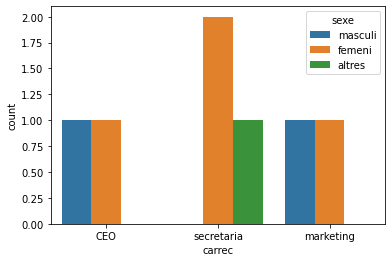

In [54]:
sns.countplot(x=data_df.carrec, hue=data_df.sexe)

Els CEOs presenten una proporció equivalent entre homes i dones. Només hi ha una persona no-binaria i ocupa el càrrec de secretària. No hi ha cap home de secretari, la major part d'aquest càrrec està ocupat per dones. A marketing passa el mateix que amb els CEOs.

<AxesSubplot:xlabel='achievements', ylabel='salari'>

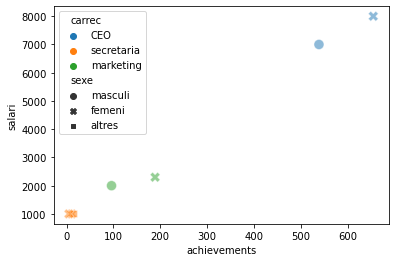

In [66]:
sns.scatterplot(data=data_df, x='achievements', y='salari', 
                hue='carrec', style='sexe', s=100, alpha=0.5)

Hi ha una relació proporcional entre nombre d'achievements i el salari.